In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb


##Describing the data
First we plot the data to see what equation the graph fits

In [4]:
data=pd.read_csv("http://bit.ly/w-data") #Importing the dataset
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Successfully imported dataset

Text(0, 0.5, 'Percentage Scored')

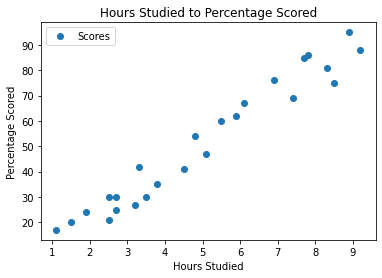

In [5]:
data.plot(x='Hours', y='Scores', style='o') #Plotting the data 
plt.title('Hours Studied to Percentage Scored')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')

##The graph shows a clear linear trend, so we will be using linear regression for this problem.

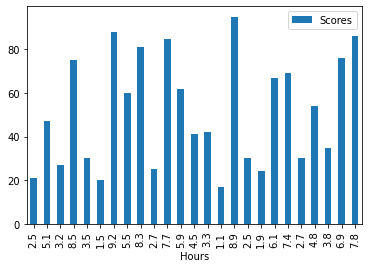

In [8]:
data.plot.bar(x='Hours', y='Scores')

In [7]:
data.corr(method='pearson') #Normalizing each value between 0 and 1 helps our model avoid errors.

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##Applying Linear Regression
We start off by importing the required modules and library

In [58]:
from sklearn.model_selection import train_test_split as assign
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2


In [14]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values
X_train,X_test,Y_train,Y_test=assign(X,Y,test_size=0.2, random_state=0)

Applying Linear Regression to training dataset (80% of total dataset)

In [15]:
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

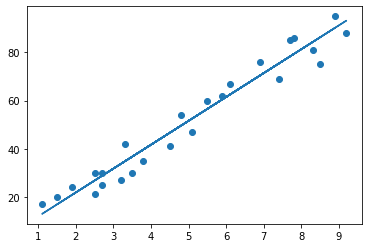

In [18]:
plt.scatter(X,Y)
graph = model.coef_*X+model.intercept_
plt.plot(X,graph)

##Evaluating the model to test the accuracy

In [23]:
print("The accuracy of the model while training is: ",model.score(X_train, Y_train))
print("The accuracy of the model while training is: ",model.score(X_test, Y_test)) 

The accuracy of the model while training is:  0.9515510725211552
The accuracy of the model while training is:  0.9454906892105354


Note: The accuracy while testing is almost always lower than the training accuracy because the model doesn't perform as well with an unfamiliar dataset.

***The closer training accuracy is to the testing accuracy, the better the model.***

##Graphing the model on training and testing datasets:

Training dataset


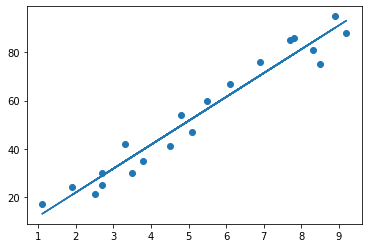

In [25]:
print("Training dataset")
plt.scatter(X_train, Y_train)
graph_train = model.coef_*X_train+model.intercept_
plt.plot(X_train,graph_train)

Testing dataset


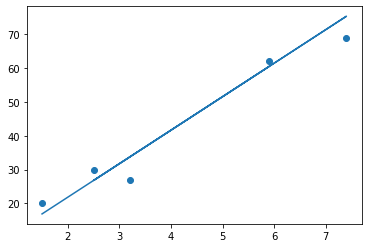

In [26]:
print("Testing dataset")
plt.scatter(X_test, Y_test)
graph_test = model.coef_*X_test+model.intercept_
plt.plot(X_test,graph_test)

##Now using the model to make predictions with our own value

In [43]:
hours_studied=9.25
array=np.array([hours_studied])
array=array.reshape(-1,1)
pred=model.predict(array)
print("The expected result after studying",hours_studied,"hours is a score of",format(pred))

The expected result after studying 9.25 hours is a score of [93.69173249]


##Finally, evaluating the model.

In [51]:
Y_pred=model.predict(X_test)
d=pd.DataFrame({"Predicted Score":Y_pred,"Actual Score":Y_test})
d.drop(index=0) #Making the serial notation start from 1.

,Predicted Score,Actual Score
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


If you use Y_train and X_train to make predictions, the model will not automatically use the dataset it trained on, but make new predictions. However, it's accuracy will still be higher.

In [60]:
print("Using the testing dataset to evaluate the model accuracy via different metrics")
print("Mean Absolute Error: ", mae(Y_test,Y_pred))
print("R-2: ", r2(Y_test,Y_pred))

Using the testing dataset to evaluate the model accuracy via different metrics
Mean Absolute Error:  4.183859899002982
R-2:  0.9454906892105354
